In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Importar funciones del notebook de utilidades
# Usamos %run para ejecutar el notebook completo y tener acceso a todas las funciones
%run ../utils/funcions.ipynb

# Verificar que la función está disponible
print("✓ Funciones importadas correctamente")

✓ Funciones importadas correctamente


In [15]:
file_path = '../data/results/capacidad_acumulada_processed.csv'


df = load_capacidad_csv_data(file_path, sep=',', decimal='.')
df.head()

,Fecha,SOLAR,EOLICA,PCH
0,2019-01-31,42.539465,0.0,0.7
1,2019-02-28,42.539465,0.0,0.7
2,2019-03-31,42.539465,0.0,0.7
3,2019-04-30,42.539465,0.0,0.7
4,2019-05-31,43.595340,0.0,0.7


In [16]:
df.tail()

,Fecha,SOLAR,EOLICA,PCH
77,2025-06-30,2905.793884,41.0,20.615945
78,2025-07-31,2907.402217,41.0,20.615945
79,2025-08-31,2909.382217,41.0,20.615945
80,2025-09-30,2909.382217,41.0,20.615945
81,2025-10-31,2909.382217,41.0,20.615945


In [ ]:
# Asegurar que 'Fecha' es tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# 1. Definir una fecha base (la primera fecha en el dataset)
fecha_base = df['Fecha'].min()

# 2. Calcular la diferencia de días entre cada fecha y la fecha base
# La variable X debe ser un array bidimensional (una matriz) para scikit-learn
X = (df['Fecha'] - fecha_base).dt.days.values.reshape(-1, 1)

# 3. Definir la variable dependiente (y)
y = df['SOLAR']

In [23]:
# 1. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inicializar y entrenar el modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

# 3. Hacer predicciones
y_pred = modelo_rl.predict(X_test)

--- Evaluación del Modelo (SOLAR vs. Días) ---
R² (Varianza Explicada): 0.7423
Error Cuadrático Medio (MSE): 175946.40
Pendiente (Coeficiente): 1.1612
Intercepto: -639.9732


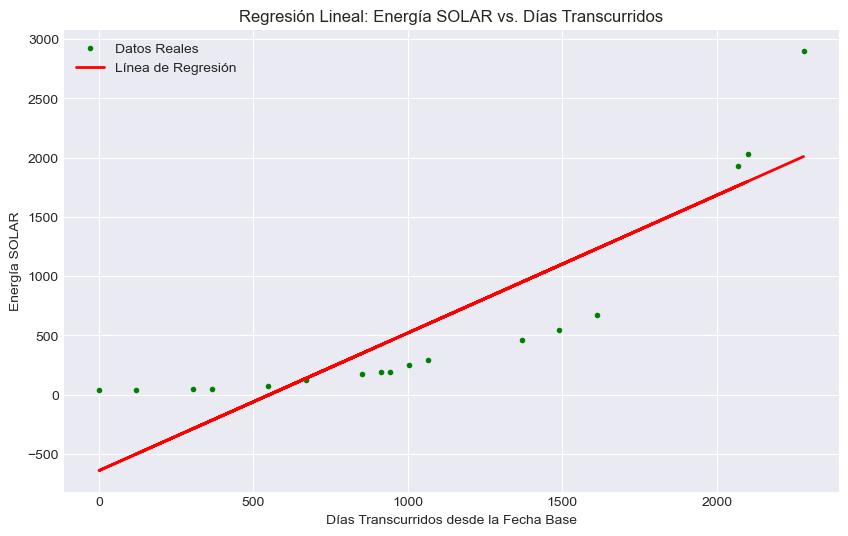

In [24]:
# 1. Calcular métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("--- Evaluación del Modelo (SOLAR vs. Días) ---")
print(f"R² (Varianza Explicada): {r2:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Pendiente (Coeficiente): {modelo_rl.coef_[0]:.4f}")
print(f"Intercepto: {modelo_rl.intercept_:.4f}")

# 2. Visualizar la regresión
plt.figure(figsize=(10, 6))

# Puntos de datos reales (usamos X_test y y_test)
plt.scatter(X_test, y_test, color='green', label='Datos Reales', marker='.')

# Línea de regresión (usamos X_test y las predicciones)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.title('Regresión Lineal: Energía SOLAR vs. Días Transcurridos')
plt.xlabel('Días Transcurridos desde la Fecha Base')
plt.ylabel('Energía SOLAR')
plt.legend()
plt.grid(True)
plt.show()